In [45]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import io
import plotly.graph_objects as go
import math

### Utiliza Matplot y Ploty para realizar las graficas
#### 1 Con los datos de Fifa, organizar a los jugadores de acuerdo al peso en las siguientes escalas y generar un cuadro tipo PIE

* Debajo 125 Lbs.
* 125-150
* 150-175
* 175 o superior

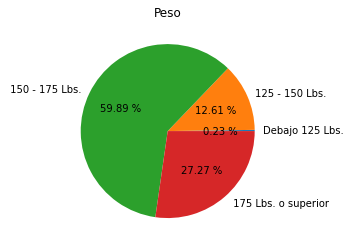

In [69]:
fifa = pd.read_csv('fifa_datos.csv')

fifa['Weight'] = fifa['Weight'].str.replace('lbs','')
fifa['Weight'] = pd.to_numeric(fifa['Weight'])

mas0 = fifa.loc[fifa['Weight'] < 125].count()[0]
mas125 = fifa.loc[(fifa['Weight'] >= 125) & (fifa['Weight'] < 150)].count()[0]
mas150 = fifa.loc[(fifa['Weight'] >= 150) & (fifa['Weight'] < 175)].count()[0]
mas175 = fifa.loc[fifa['Weight'] >= 175].count()[0]

plt.figure()

etiquetas = ['Debajo 125 Lbs.', '125 - 150 Lbs.', ' 150 - 175 Lbs.', ' 175 Lbs. o superior']
plt.pie([mas0,mas125,mas150,mas175], labels=etiquetas, autopct='%.2f %%')
plt.title('Peso')

plt.show()

#### 2 Generar un grafico de barras (histograma) de acuerdo a su habilidad (Overall)  en base a los siguientes segmentos contando el número de jugadores

* 40
* 50
* 60
* 70
* 80
* 90

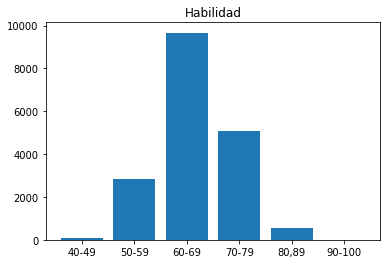

In [78]:
fifa = pd.read_csv('fifa_datos.csv')

l40 = fifa.loc[fifa['Overall'] < 50].count()[0]
l50 = fifa.loc[(fifa['Overall'] >= 50) & (fifa['Overall'] < 60)].count()[0]
l60 = fifa.loc[(fifa['Overall'] >= 60) & (fifa['Overall'] < 70)].count()[0]
l70 = fifa.loc[(fifa['Overall'] >= 70) & (fifa['Overall'] < 80)].count()[0]
l80 = fifa.loc[(fifa['Overall'] >= 80) & (fifa['Overall'] < 90)].count()[0]
l90 = fifa.loc[fifa['Overall'] >= 90].count()[0]

etiquetas = ['40-49','50-59','60-69','70-79','80,89','90-100']

plt.figure()
barraas = plt.bar(etiquetas,[l40,l50,l60,l70,l80,l90])
plt.title('Habilidad')

plt.show()


#### 3 Investigar alguna herramienta o software que permita generar reportes con Python.

##### ReportLab

ReportLab es un conjunto de herramientas que permite crear documentos PDF desde python. Esta libreria permite generar textos, figuras, graficas y otras ilustraciones en un mismo documento.

Para empezar, se puede generar el archivo PDF vacio con el uso del siguiente codigo.

In [6]:
from reportlab.pdfgen import canvas
#para poder especificar tamaños de las hojas
from reportlab.lib.pagesizes import A4, letter

c = canvas.Canvas("reporte.pdf", pagesize=A4)
c.save()

#Ddimensiones de las hojas
print(letter)
print(A4)

(612.0, 792.0)
(595.2755905511812, 841.8897637795277)


Para poder agregar cualquier texto al documento se lo hace mediante un drawString donde se indican las coordenadas (x,y) donde se encontrara el texto y el mensaje que mostrara.

In [8]:
w, h = A4
c = canvas.Canvas("reporte.pdf", pagesize=A4)
c.drawString(50, h - 50, "Reporte 1")
c.showPage()
c.save()

No obstante, tambien existe otra forma mas comoda para la introduccion de textos mas largos usando text objects, el resultado es el siguiente:

In [11]:
w, h = A4
c = canvas.Canvas("reporte.pdf", pagesize=A4)
text = c.beginText(50, h - 50)
text.setFont("Times-Roman", 12)
text.textLine("Primer mensaje")
text.textLine("Segundo mensaje")
text.textLines("Tercer mensaje\nContinuacion del tercer mensaje pero con un salto de linea")
c.drawText(text)
c.showPage()
c.save()

Para ingresar alguna figura geometrica, ReportLab cuenta con algunas funciones que lo permiten:
* line: linea
* rect: rectangulo
* roundRect: rectangulo con puntas redondeadas
* circle: circulos
* ellipse: elipse


In [9]:

w, h = A4
c = canvas.Canvas("reporte.pdf", pagesize=A4)
c.drawString(30, h - 50, "Línea")
x = 120
y = h - 45
c.line(x, y, x + 100, y)
c.drawString(30, h - 100, "Rectángulo")
c.rect(x, h - 120, 100, 50)
c.drawString(30, h - 170, "Círculo")
c.circle(170, h - 165, 20)
c.drawString(30, h - 240, "Elipse")
c.ellipse(x, y - 170, x + 100, y - 220)
c.showPage()
c.save()

Esta libreria tambien permite la implementacion de imagenes dentro del documento, para esto, ReportLab requiere la libreria Pillow para la lectura de la imagen y luego se la plasma en el documento con la funcion drawImage.

In [14]:
#para la lectura de imagen, se lo puede hacer directo, pero es preferible poder conocer la informacion de la imagen que se va a presentar en el documento (ej. tamaños)
from reportlab.lib.utils import ImageReader
from reportlab.pdfgen import canvas

w, h = A4
c = canvas.Canvas("reporte.pdf", pagesize=A4)

img = ImageReader("upsLogo.png")

img_w, img_h = img.getSize()

c.drawImage(img, 0, h - img_h)
c.save()

Por ultimo, esta libreria permite generar grillas/tablas dentro del documento, por lo que tiene un metodo llamado grid, aca un ejemplo practico de la generacion de una tabla.

In [15]:
import itertools
from random import randint
from statistics import mean
from reportlab.lib.pagesizes import A4
from reportlab.pdfgen import canvas

def grouper(iterable, n):
    args = [iter(iterable)] * n
    return itertools.zip_longest(*args)
def export_to_pdf(data):
    c = canvas.Canvas("reporte.pdf", pagesize=A4)
    w, h = A4
    max_rows_per_page = 45
    # Margin.
    x_offset = 50
    y_offset = 50
    # Space between rows.
    padding = 15
    
    xlist = [x + x_offset for x in [0, 200, 250, 300, 350, 400, 480]]
    ylist = [h - y_offset - i*padding for i in range(max_rows_per_page + 1)]
    
    for rows in grouper(data, max_rows_per_page):
        rows = tuple(filter(bool, rows))
        c.grid(xlist, ylist[:len(rows) + 1])
        for y, row in zip(ylist[:-1], rows):
            for x, cell in zip(xlist, row):
                c.drawString(x + 2, y - padding + 3, str(cell))
        c.showPage()
    
    c.save()
data = [("NOMBRE", "NOTA 1", "NOTA 2", "NOTA 3", "PROM.", "ESTADO")]
for i in range(1, 101):
    exams = [randint(0, 10) for _ in range(3)]
    avg = round(mean(exams), 2)
    state = "Aprobado" if avg >= 4 else "Desaprobado"
    data.append((f"Alumno {i}", *exams, avg, state))
export_to_pdf(data)
